In [1]:
import eeweather as ee
import json
import datetime
import pytz

#http://eeweather.openee.io/en/latest/basics.html
#https://github.com/openeemeter/eeweather/blob/master/scripts/tutorial.ipynb

In [2]:
zip_code = '92602'

In [3]:
lat, lng = ee.zcta_to_lat_long(zip_code)
lat, lng

(33.7458602672367, -117.748639071815)

In [4]:
#Produces a list of stations that are close to the zip code of choice. 
# This is a Pandas dataframe that can be indexed worked with as a normal Pandas object.

ranked_stations = ee.rank_stations(lat, lng)
ranked_stations.head()

,rank,distance_meters,latitude,longitude,iecc_climate_zone,iecc_moisture_regime,ba_climate_zone,ca_climate_zone,rough_quality,elevation,state,tmy3_class,is_tmy3,is_cz2010,difference_elevation_meters
usaf_id,,,,,,,,,,,,,,,
722908,1,8866.283228,33.667,-117.733,3,B,Hot-Dry,CA_08,low,117.0,CA,None,False,False,None
690140,2,8866.283228,33.667,-117.733,3,B,Hot-Dry,CA_08,low,116.7,CA,None,False,False,None
722915,3,9327.882167,33.700,-117.833,3,B,Hot-Dry,CA_08,low,16.5,CA,None,False,False,None
722977,4,13103.802968,33.680,-117.866,3,B,Hot-Dry,CA_06,high,16.5,CA,II,True,True,None
722973,5,20251.918171,33.600,-117.880,3,B,Hot-Dry,None,low,3.0,CA,None,False,False,None


In [5]:
#Use boolean indexing to sift through a dataframe.  

ranked_stations[ranked_stations['elevation'] > 200].head(10)

,rank,distance_meters,latitude,longitude,iecc_climate_zone,iecc_moisture_regime,ba_climate_zone,ca_climate_zone,rough_quality,elevation,state,tmy3_class,is_tmy3,is_cz2010,difference_elevation_meters
usaf_id,,,,,,,,,,,,,,,
722869,12,36660.564922,33.952,-117.439,3,B,Hot-Dry,CA_10,high,245.2,CA,II,True,True,None
722865,13,36770.673069,34.067,-117.650,3,B,Hot-Dry,CA_10,low,303.9,CA,None,False,False,None
747040,14,37046.252014,34.056,-117.600,3,B,Hot-Dry,CA_10,high,289.3,CA,None,False,False,None
722887,19,39409.819219,34.100,-117.783,3,B,Hot-Dry,CA_09,low,308.2,CA,None,False,False,None
720329,21,40997.817231,34.112,-117.688,3,B,Hot-Dry,CA_10,low,438.6,CA,None,False,False,None
722860,27,49226.364427,33.900,-117.250,3,B,Hot-Dry,CA_10,high,468.2,CA,II,True,True,None
749169,31,55737.702078,34.133,-118.133,3,B,Hot-Dry,CA_09,low,231.0,CA,None,False,False,None
722866,36,61283.626016,34.095,-117.235,3,B,Hot-Dry,CA_10,low,353.3,CA,None,False,False,None
722890,37,61522.262308,34.233,-118.067,3,B,Hot-Dry,CA_16,low,1739.2,CA,None,False,False,None


In [6]:
ranked_stations.head()

,rank,distance_meters,latitude,longitude,iecc_climate_zone,iecc_moisture_regime,ba_climate_zone,ca_climate_zone,rough_quality,elevation,state,tmy3_class,is_tmy3,is_cz2010,difference_elevation_meters
usaf_id,,,,,,,,,,,,,,,
722908,1,8866.283228,33.667,-117.733,3,B,Hot-Dry,CA_08,low,117.0,CA,None,False,False,None
690140,2,8866.283228,33.667,-117.733,3,B,Hot-Dry,CA_08,low,116.7,CA,None,False,False,None
722915,3,9327.882167,33.700,-117.833,3,B,Hot-Dry,CA_08,low,16.5,CA,None,False,False,None
722977,4,13103.802968,33.680,-117.866,3,B,Hot-Dry,CA_06,high,16.5,CA,II,True,True,None
722973,5,20251.918171,33.600,-117.880,3,B,Hot-Dry,None,low,3.0,CA,None,False,False,None


In [7]:
lat, lng = ee.zcta_to_lat_long('91755')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
station

ISDStation('722874')

In [8]:
station.json()

{'elevation': 54.6,
 'latitude': 34.024,
 'longitude': -118.291,
 'icao_code': 'KCQT',
 'name': 'DOWNTOWN L.A./USC CAMPUS',
 'quality': 'high',
 'wban_ids': ['93134'],
 'recent_wban_id': '93134',
 'climate_zones': {'iecc_climate_zone': '3',
  'iecc_moisture_regime': 'B',
  'ba_climate_zone': 'Hot-Dry',
  'ca_climate_zone': 'CA_08'}}

In [9]:
station.json()['name']

'DOWNTOWN L.A./USC CAMPUS'

In [10]:
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)

In [11]:
temp_c = station.load_cz2010_hourly_temp_data(start_date, end_date)
temp_f = temp_c * 1.8 + 32 

In [12]:
usc_df = temp_f.to_frame(name='temp_f')
usc_df.head(10)

,temp_f
2017-01-01 00:00:00+00:00,57.02
2017-01-01 01:00:00+00:00,56.12
2017-01-01 02:00:00+00:00,54.68
2017-01-01 03:00:00+00:00,51.80
2017-01-01 04:00:00+00:00,51.08
2017-01-01 05:00:00+00:00,48.56
2017-01-01 06:00:00+00:00,50.00
2017-01-01 07:00:00+00:00,50.00
2017-01-01 08:00:00+00:00,48.20
2017-01-01 09:00:00+00:00,46.04


In [13]:
#Send hourly data from dataframe to a CSV file. 

usc_df.to_csv('t2017_eeweather_91755_cz2010.csv', sep=',', encoding='utf-8')

In [14]:
import eeweather as ee
import json
import datetime
import pytz
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
lat, lng = ee.zcta_to_lat_long('92602')
lat, lng

(33.7458602672367, -117.748639071815)

In [16]:
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
station

ISDStation('722977')

In [17]:
station.json()['name']

'J. WAYNE APT-ORANGE CO APT'

In [18]:
start_date = datetime.datetime(2018, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2018, 12, 31, tzinfo=pytz.UTC)

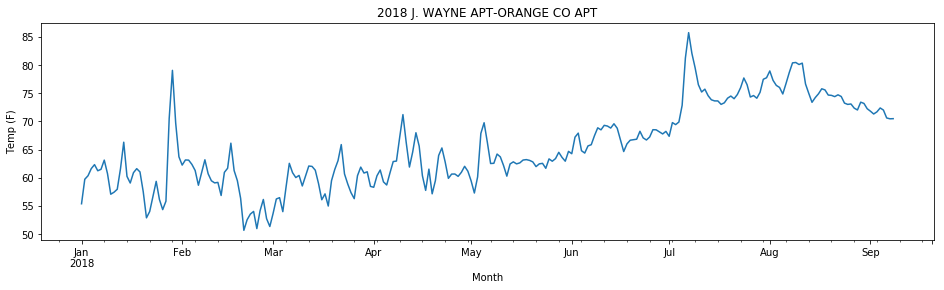

In [19]:
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2018 " + station.json()['name'])
plt.show()

In [20]:
irvine_18_df = temp_F.to_frame(name='temp_F').head(10)
irvine_18_df

,temp_F
2018-01-01 00:00:00+00:00,55.380910
2018-01-02 00:00:00+00:00,59.733156
2018-01-03 00:00:00+00:00,60.357281
2018-01-04 00:00:00+00:00,61.625256
2018-01-05 00:00:00+00:00,62.330494
2018-01-06 00:00:00+00:00,61.241875
2018-01-07 00:00:00+00:00,61.501356
2018-01-08 00:00:00+00:00,63.132238
2018-01-09 00:00:00+00:00,60.722794
2018-01-10 00:00:00+00:00,57.075956


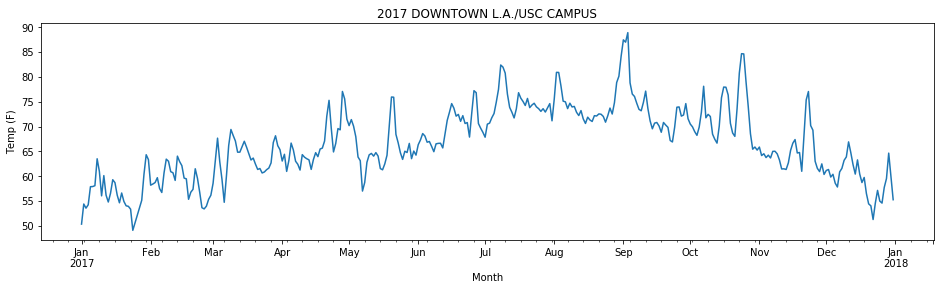

In [21]:
lat, lng = ee.zcta_to_lat_long('91755')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [22]:
usc_df = temp_F.to_frame(name='temp_F').head(10)
usc_df

,temp_F
2017-01-01 00:00:00+00:00,50.339739
2017-01-02 00:00:00+00:00,54.387500
2017-01-03 00:00:00+00:00,53.553475
2017-01-04 00:00:00+00:00,54.238900
2017-01-05 00:00:00+00:00,57.876368
2017-01-06 00:00:00+00:00,57.905632
2017-01-07 00:00:00+00:00,58.080337
2017-01-08 00:00:00+00:00,63.501775
2017-01-09 00:00:00+00:00,60.957300
2017-01-10 00:00:00+00:00,56.032437


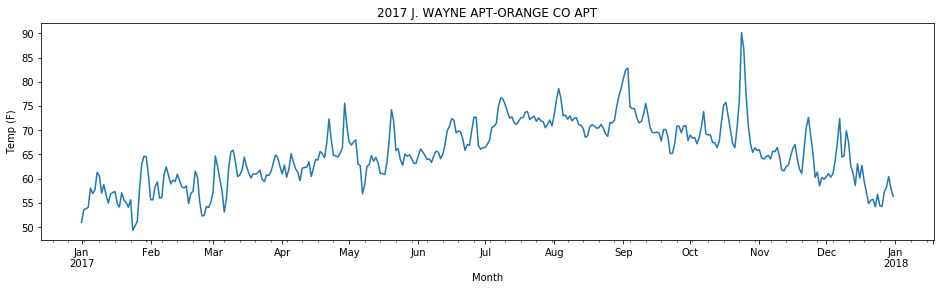

In [23]:
lat, lng = ee.zcta_to_lat_long('92602')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [24]:
irvine_df = temp_F.to_frame(name='temp_F').head(10)
irvine_df

,temp_F
2017-01-01 00:00:00+00:00,50.981727
2017-01-02 00:00:00+00:00,53.589125
2017-01-03 00:00:00+00:00,53.795156
2017-01-04 00:00:00+00:00,54.057594
2017-01-05 00:00:00+00:00,58.054625
2017-01-06 00:00:00+00:00,56.907281
2017-01-07 00:00:00+00:00,57.630456
2017-01-08 00:00:00+00:00,61.271925
2017-01-09 00:00:00+00:00,60.560088
2017-01-10 00:00:00+00:00,56.994719


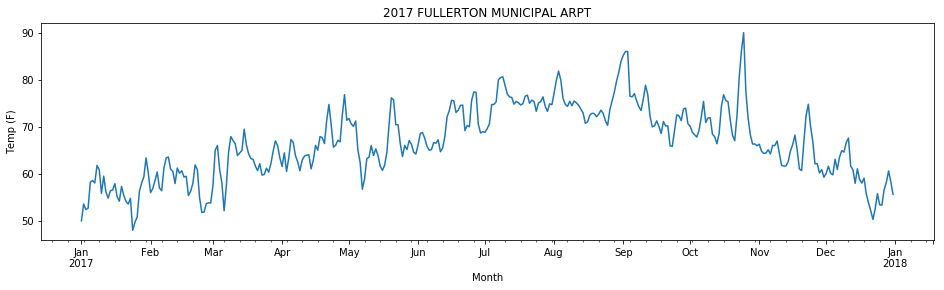

In [25]:
lat, lng = ee.zcta_to_lat_long('91744')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [26]:
fullerton_df = temp_F.to_frame(name='temp_F').head(10)
fullerton_df

,temp_F
2017-01-01 00:00:00+00:00,49.988227
2017-01-02 00:00:00+00:00,53.570606
2017-01-03 00:00:00+00:00,52.386862
2017-01-04 00:00:00+00:00,52.682688
2017-01-05 00:00:00+00:00,58.224469
2017-01-06 00:00:00+00:00,58.552175
2017-01-07 00:00:00+00:00,58.030175
2017-01-08 00:00:00+00:00,61.760619
2017-01-09 00:00:00+00:00,60.839469
2017-01-10 00:00:00+00:00,55.840231


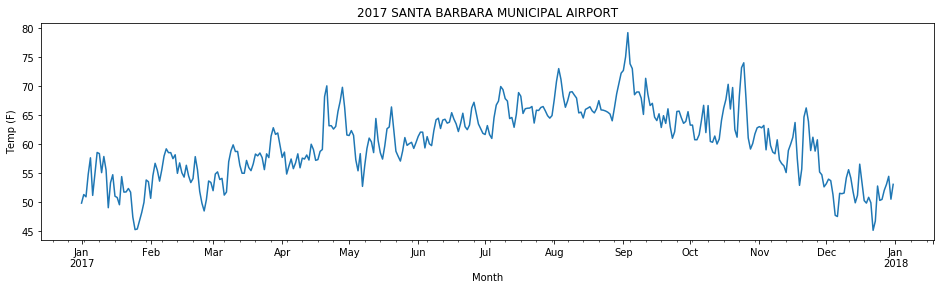

In [27]:
lat, lng = ee.zcta_to_lat_long('93101')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [28]:
sb_df = temp_F.to_frame(name='temp_F').head(10)
sb_df

,temp_F
2017-01-01 00:00:00+00:00,49.869691
2017-01-02 00:00:00+00:00,51.349594
2017-01-03 00:00:00+00:00,50.955312
2017-01-04 00:00:00+00:00,54.846513
2017-01-05 00:00:00+00:00,57.679912
2017-01-06 00:00:00+00:00,51.200138
2017-01-07 00:00:00+00:00,54.847300
2017-01-08 00:00:00+00:00,58.599388
2017-01-09 00:00:00+00:00,58.407206
2017-01-10 00:00:00+00:00,55.120275


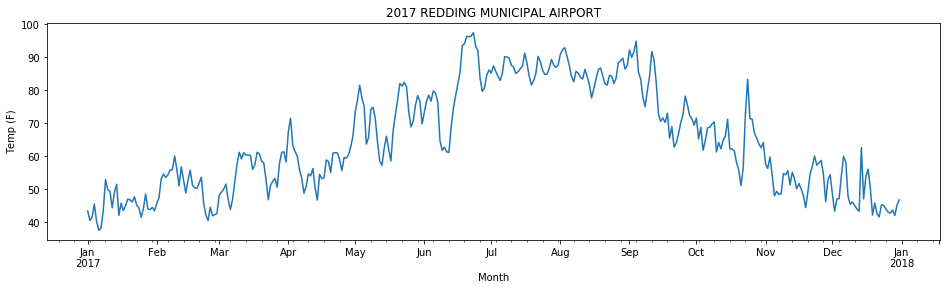

In [29]:
lat, lng = ee.zcta_to_lat_long('96001')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [30]:
redding_df = temp_F.to_frame(name='temp_F').head(10)
redding_df

,temp_F
2017-01-01 00:00:00+00:00,43.440563
2017-01-02 00:00:00+00:00,40.562313
2017-01-03 00:00:00+00:00,41.507813
2017-01-04 00:00:00+00:00,45.491750
2017-01-05 00:00:00+00:00,40.283875
2017-01-06 00:00:00+00:00,37.580312
2017-01-07 00:00:00+00:00,38.230813
2017-01-08 00:00:00+00:00,43.611813
2017-01-09 00:00:00+00:00,52.971438
2017-01-10 00:00:00+00:00,49.954688


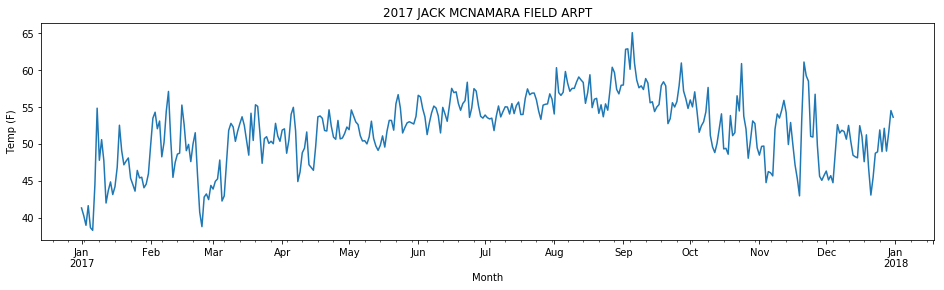

In [31]:
lat, lng = ee.zcta_to_lat_long('95531')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [32]:
cc_df = temp_F.to_frame(name='temp_F').head(10)
cc_df

,temp_F
2017-01-01 00:00:00+00:00,41.301201
2017-01-02 00:00:00+00:00,40.254435
2017-01-03 00:00:00+00:00,38.944702
2017-01-04 00:00:00+00:00,41.611675
2017-01-05 00:00:00+00:00,38.622437
2017-01-06 00:00:00+00:00,38.263563
2017-01-07 00:00:00+00:00,44.495200
2017-01-08 00:00:00+00:00,54.855787
2017-01-09 00:00:00+00:00,47.778087
2017-01-10 00:00:00+00:00,50.581081


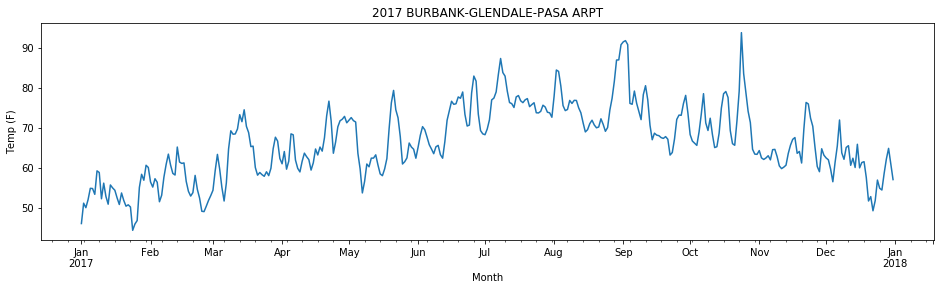

In [33]:
lat, lng = ee.zcta_to_lat_long('90046')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)

start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)

temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 

ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [48]:
glendale_data = temp_F.to_frame(name='temp_f')

In [49]:
glendale_data.to_csv('burbank.csv')

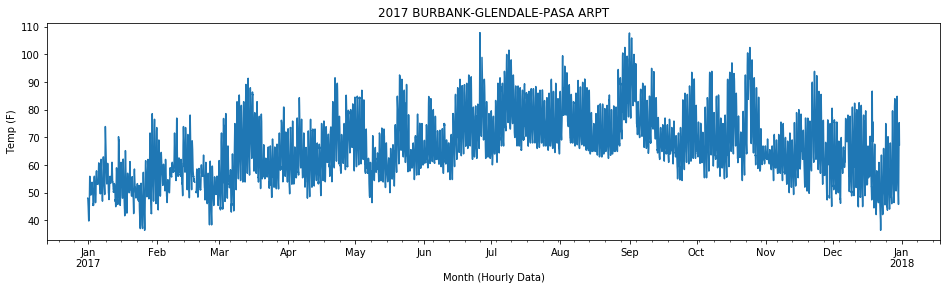

In [52]:
lat, lng = ee.zcta_to_lat_long('90046')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)

start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)

temp_C_h = station.load_isd_hourly_temp_data(start_date, end_date)
temp_F_h = temp_C * 1.8 + 32 

ax = temp_F_h.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month (Hourly Data)')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [67]:
glendale_hr_temp_f = temp_F_h.to_frame(name='name_f')

#Convert the pandas series to a dataframe.

In [68]:
glendale_hr_temp_f.sample(frac=0.001)

#Sample 0.1% of the dataframe to see what the data looks like.

,name_f
2017-04-20 07:00:00+00:00,61.39775
2017-08-09 10:00:00+00:00,66.91475
2017-11-16 23:00:00+00:00,76.55285
2017-09-03 01:00:00+00:00,98.41145
2017-07-19 00:00:00+00:00,84.14480
2017-03-22 02:00:00+00:00,57.16310
2017-11-10 01:00:00+00:00,64.18265
2017-10-21 05:00:00+00:00,64.39145
2017-01-12 06:00:00+00:00,53.95850


In [69]:
glendale_hr_temp_f.shape

#There are missing points in the dataset. 

(8737, 1)

In [70]:
glendale_hr_temp_f.to_csv('glendale_hourly.csv')

#Export dataframe to CSV file. 